# Lending Club Case Study
## Business Objective
The largest online loan marketplace lending Club facilitates different types of loans such as personal loans, business loans etc and also financing of medical procedures. The interest rate on loans are very low which encourages borrowers to avail loan  through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who are categorized as defaultee causes the largest amount of loss to the lenders. 
In our Case Study, the customers labelled as 'charged-off' are the 'defaultees'.

The **Objective** of this study is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

## Approach

To achieve the above objective we have a four Step Approach for our Analysis. The steps are as follows:

   
    1- Data Exploration
    2- Data Cleansing
    
    3- Data Analysis
            Univariate Analysis
            Bivariate Analysis
        
    4- Analysis Recommendations



### 1. Data Exploration

The data is loaded into the Data Frames


In [5]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [67]:
# Load the 'application_data' file into a Data Frame
# Reading the csv files using read_csv

lending_df = pd.read_csv(r"C:\Users\ayush\Downloads\loan.csv") 
lending_df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [68]:
lending_df.shape

(39717, 111)

## 2. Data Cleansing

This part comprises dropping of columns which have no values and also which are insignificant for our analysis.

In [69]:
# Calculating percentage of missing values in each column
print(round(100*(lending_df.isnull().sum() / len(lending_df)),2))


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


###  Dropping columns with high percentage of missing values.

In [70]:
# drop columns with high percentage of missing values. 
lending_df = lending_df.loc[:,round(100*(lending_df.isnull().sum() / len(lending_df)),2) <= 50]

In [71]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [72]:
# get the percentage of missing values in each column
print(round(100*(lending_df.isnull().sum() / len(lending_df)),2))


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [73]:
#check rows which contains 100% empty data
round((100*lending_df.isnull().sum(axis=1))/len(lending_df.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

##  Data Preparation

For the purpose of data preparation we have to determine our **Target Variable**. The target Variable chosen is **Loan Status** as per the Data Dictionary

In order to have **Categorical Charts** the target variable is converted to a Number.

In [74]:
#check the unique target values
lending_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [75]:
#The Current loan status will have data based on the current running state. So its better to drop it from the rows since no past
#data will be provided from it.

loan_status_list = ['Fully Paid','Charged Off']
lending_df=lending_df[lending_df['loan_status'].isin(loan_status_list)]
lending_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# 3. Data Analysis
By using plots, we analyse the data.


In [77]:
# After dropping the Current loan status, counting the total values of rest field i.e. Fully paid and Charged Off
lending_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

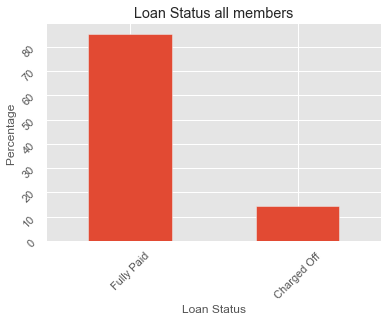

In [79]:
#Plotting Loan Status against the percentage

(lending_df.loan_status.value_counts()/len(lending_df)*100).plot.bar()
plt.xlabel('Loan Status')
plt.ylabel('Percentage ')
plt.title('Loan Status all members')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [80]:
print(round(lending_df.loan_status.value_counts()/len(lending_df)*100 ,2)) #rounding to 2 decimal places

Fully Paid     85.41
Charged Off    14.59
Name: loan_status, dtype: float64


So by above analysis we got to know that almost 85.41% are paid off and 14.59% are defaultee which has to be analysed.

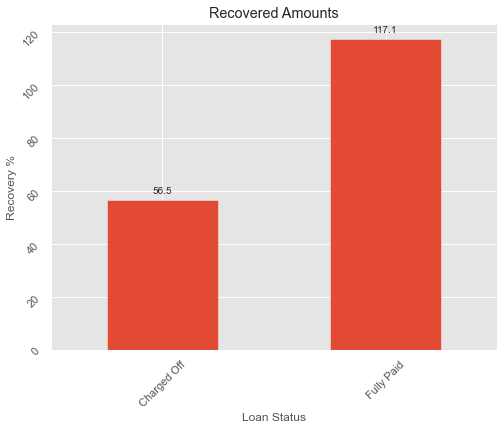

In [81]:
# Plotting Loan status against Recovery%
plt.figure(figsize=(8,6))
plt.style.use('ggplot')
splot = round(lending_df.groupby('loan_status').total_pymnt.sum() * 100 / lending_df.groupby('loan_status').loan_amnt.sum(),2).plot.bar()
plt.title("Recovered Amounts")
plt.ylabel("Recovery %")
plt.xlabel("Loan Status")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()


So from the above Plot it can be concluded that the Lending Club could only recover around 57% of the loan amount when loans are defaulted. Otherwise they end up making a profit of 17%.



In [82]:
#convert loan status data into numerical data 
#i.e. Fully Paid = 0 and Charged Off = 1
lending_df['loan_status']=lending_df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
lending_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,0,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,0,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,0,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [20]:
#Extract necessary columns which might impact the target columns i.e. Feature selection
lending_df=lending_df.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose','total_pymnt','total_pymnt_inv',
             'addr_state','dti')]
lending_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,total_pymnt,total_pymnt_inv,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,5863.155187,5833.84,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1008.710000,1008.71,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,3005.666844,3005.67,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,12231.890000,12231.89,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,5632.210000,5632.21,AZ,11.20


In [21]:
#create new column from the existing column
lending_df['year'] = lending_df['issue_d'].apply(lambda x:x.split('-')[1])
lending_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,total_pymnt,total_pymnt_inv,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,5863.155187,5833.84,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1008.710000,1008.71,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,3005.666844,3005.67,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,12231.890000,12231.89,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,5632.210000,5632.21,AZ,11.20,11


In [22]:
#convert the data type from string to int and check the type
lending_df['year']=lending_df['year'].astype(np.int)
type(lending_df['year'][0])

numpy.int32

In [23]:
lending_df.year.unique()

array([11, 10,  9,  8,  7])

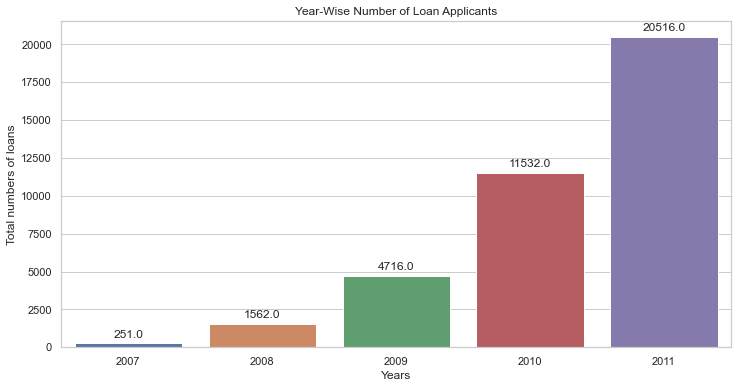

In [24]:
#draw a countplot to show the year wise increasing amount of loans in lending clubs 
plt.figure(figsize=(12,6))
sns.set(style='whitegrid')
splot=ax=sns.countplot(x='year',data=lending_df)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total numbers of loans',title='Year-Wise Number of Loan Applicants')
plt.xticks(xpos,years)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

## In this univariate analysis there is growth between 2007-2011 in the number of loan applicants

In [25]:
#change the type of int_rate column from string to float
lending_df['int_rate']=lending_df['int_rate'].str.replace('%','')
lending_df['int_rate']=lending_df['int_rate'].astype(np.float)
type(lending_df['int_rate'][0])

numpy.float64

In [26]:
#create new column from the existing column
lending_df['month'] = lending_df['issue_d'].apply(lambda x:x.split('-')[0])
lending_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,total_pymnt,total_pymnt_inv,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Verified,Dec-11,0,credit_card,5863.155187,5833.84,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,car,1008.710000,1008.71,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Not Verified,Dec-11,0,small_business,3005.666844,3005.67,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Source Verified,Dec-11,0,other,12231.890000,12231.89,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Source Verified,Dec-11,0,wedding,5632.210000,5632.21,AZ,11.20,11,Dec


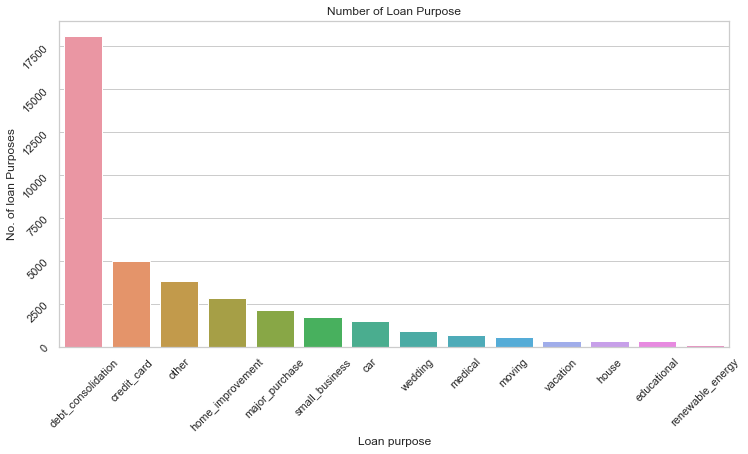

In [27]:
#Count plot to show the different loan purpose from the lending clubs
plt.figure(figsize=(12,6))
ax = sns.countplot(x='purpose',data=lending_df,order=lending_df['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Number of Loan Purpose')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
#plt.yscale('log')
plt.show()

### The five major purposes of Loan applications are - ‘debt_consolidation’ , ‘credit_card’ , ‘other’ , ‘home_improvement’ & ‘major_purchase’

### The highest in loan puprose is 'debt_consolidation’ 

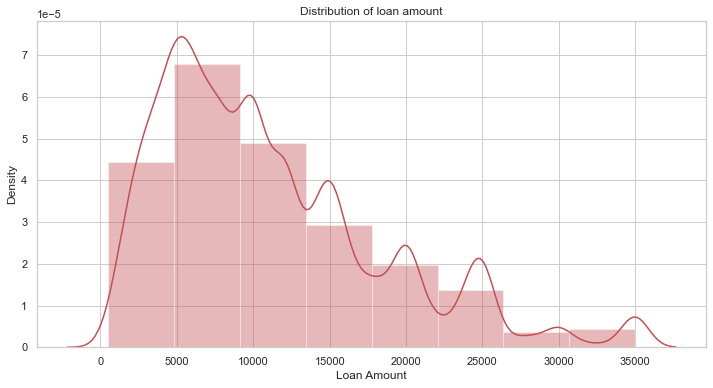

In [28]:
#loan amount distribution 
plt.figure(figsize=(12,6))
ax=sns.distplot(lending_df['loan_amnt'],bins=8,color='r')
ax.set(xlabel='Loan Amount',title='Distribution of loan amount')
plt.show()

### We can visualize the distribution of loan amount i.e the amount of loan applied from the above plot .                        The maximum loan range amount is between 5000-10000

In [83]:
#creating separate dataframe of defaultees
defaultees_df=lending_df.loc[lending_df['loan_status']==1]
defaultees_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.71,1008.71,456.46,435.17,0.0,117.08,1.1100,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,f,0.0,0.0,646.02,646.02,162.02,294.94,0.0,189.06,2.0900,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,f,0.0,0.0,1476.19,1469.34,673.48,533.42,0.0,269.29,2.5200,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,Va. Dept of Conservation/Recreation,< 1 year,RENT,30000.0,Source Verified,Dec-11,1,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/15/11 > Plan to pay off...,debt_consolidation,freedom,245xx,VA,10.08,0,Apr-04,1,4,0,10452,91.70%,9,f,0.0,0.0,2270.70,2270.70,1256.14,570.26,0.0,444.30,4.1600,Jul-12,305.38,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,SFMTA,3 years,RENT,100000.0,Source Verified,Dec-11,1,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other Loan,951xx,CA,7.06,0,May-91,2,14,0,11997,55.50%,29,f,0.0,0.0,7471.99,7471.99,5433.47,1393.42,0.0,645.10,6.3145,Oct-13,325.74,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [84]:
#calculate the percentage of loan defaultees according to grade
grade_df=pd.DataFrame(data=round((100*defaultees_df['grade'].value_counts())/lending_df['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaultee_percentage'},inplace=True)
grade_df

,defaultee_percentage
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


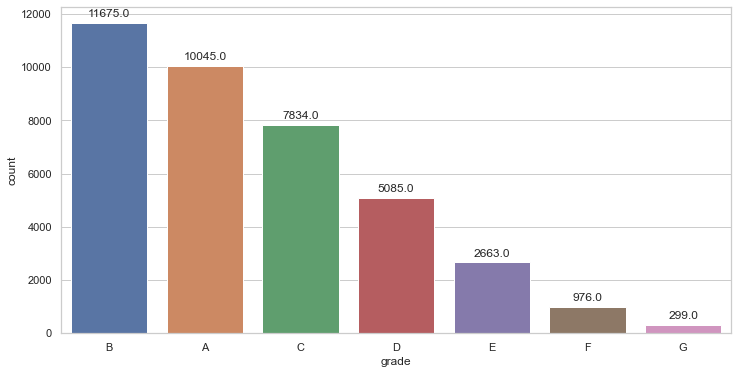

In [31]:
plt.figure(figsize=(12,6))
splot=sns.countplot(x='grade',data=lending_df,order=lending_df.grade.value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

### Inference: Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans

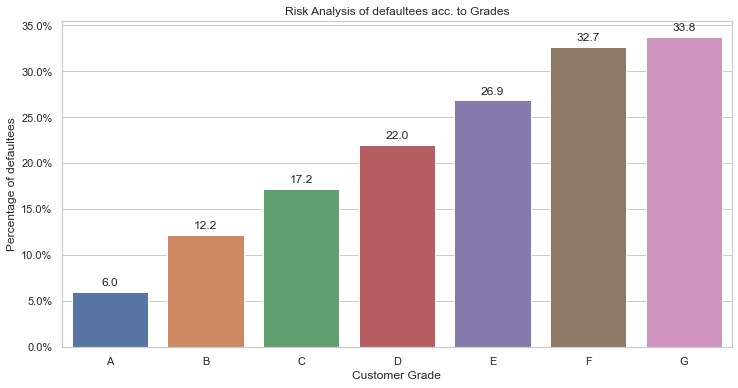

In [32]:
import matplotlib.ticker as mtick
plt.figure(figsize=(12,6))
splot=ax=sns.barplot(x=grade_df.index,y='defaultee_percentage',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of defaultees',title='Risk Analysis of defaultees acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

### The percentage of defaultees is the highest in Grade G group

In [33]:
#calculate the percentage of loan defaultees according to loan purpose
purpose_df=pd.DataFrame(data=round((100*defaultees_df['purpose'].value_counts())/lending_df['purpose'].value_counts(),2))
purpose_df.rename(columns={'purpose':'defaultee_percentage'},inplace=True)
purpose_df.sort_values(by='defaultee_percentage',ascending=False,inplace=True)
purpose_df

,defaultee_percentage
small_business,27.08
renewable_energy,18.63
educational,17.23
other,16.38
house,16.08
moving,15.97
medical,15.57
debt_consolidation,15.33
vacation,14.13
home_improvement,12.07


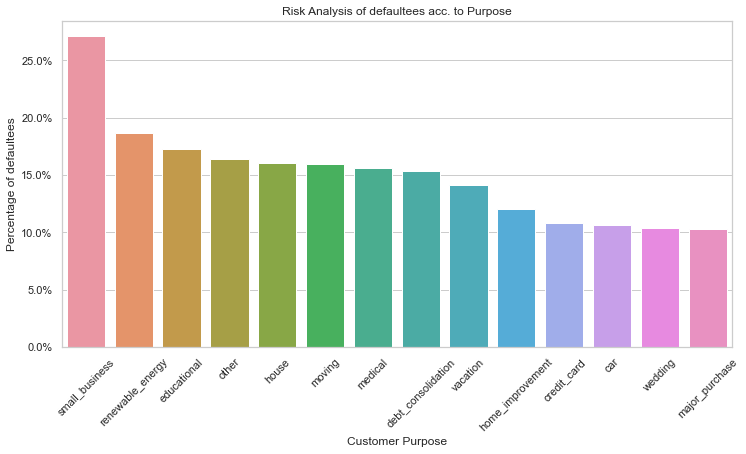

In [34]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=purpose_df.index,y='defaultee_percentage',data=purpose_df)
ax.set(xlabel='Customer Purpose', ylabel='Percentage of defaultees',title='Risk Analysis of defaultees acc. to Purpose')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()


### The percentage of risk of defaultees is the largest in the Loan Purpose – ‘small_business’ , followed by ‘renewable_energy’ , ‘educational’ and so on.

In [35]:
#calculate the percentage of loan defaultees according to Employee experience
emp_df=pd.DataFrame(data=round((100*defaultees_df['emp_length'].value_counts())/lending_df['emp_length'].value_counts(),2))
emp_df.rename(columns={'emp_length':'defaultee_percentage'},inplace=True)
emp_df.sort_values(by='defaultee_percentage',ascending=False,inplace=True)
emp_df

,defaultee_percentage
10+ years,15.68
7 years,15.37
1 year,14.39
5 years,14.34
< 1 year,14.17
6 years,14.16
8 years,14.15
3 years,13.83
4 years,13.82
2 years,13.21


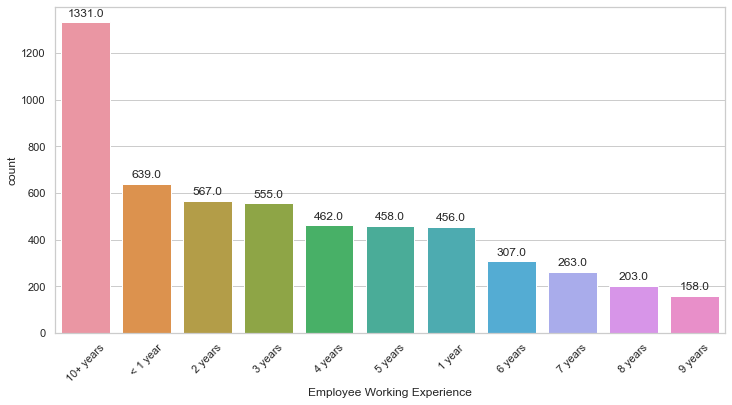

In [36]:
#calculate the count of loan defaultees according to Employee experience

plt.figure(figsize=(12,6))
splot=sns.countplot(x='emp_length', data=defaultees_df,order=defaultees_df.emp_length.value_counts().index)
plt.xlabel('Employee Working Experience')
plt.xticks(rotation=45)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

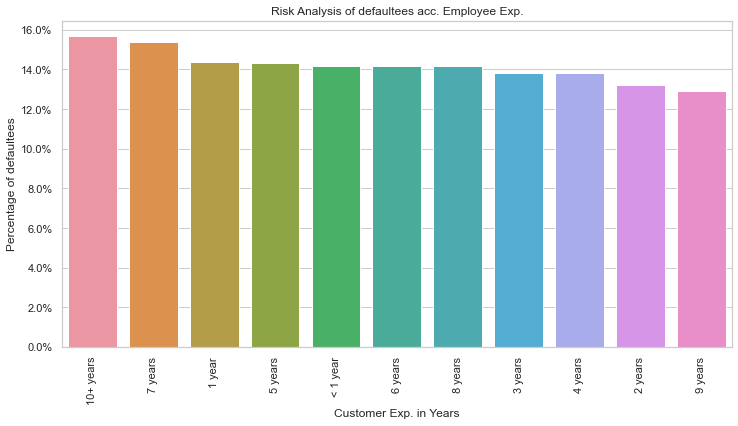

In [37]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=emp_df.index,y='defaultee_percentage',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of defaultees',title='Risk Analysis of defaultees acc. Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

### For customer experience - 10+ years & minimum for 9 year’s experience the percentage of risk of defaultees is maximum

In [38]:
#calculate the percentage of loan defaultees according to home onwership
home_df=pd.DataFrame(data=round((100*defaultees_df['home_ownership'].value_counts())/lending_df['home_ownership'].value_counts(),2))
home_df.rename(columns={'home_ownership':'defaultee_percentage'},inplace=True)
home_df.sort_values(by='defaultee_percentage',ascending=False,inplace=True)
home_df.dropna(inplace=True)
home_df

,defaultee_percentage
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


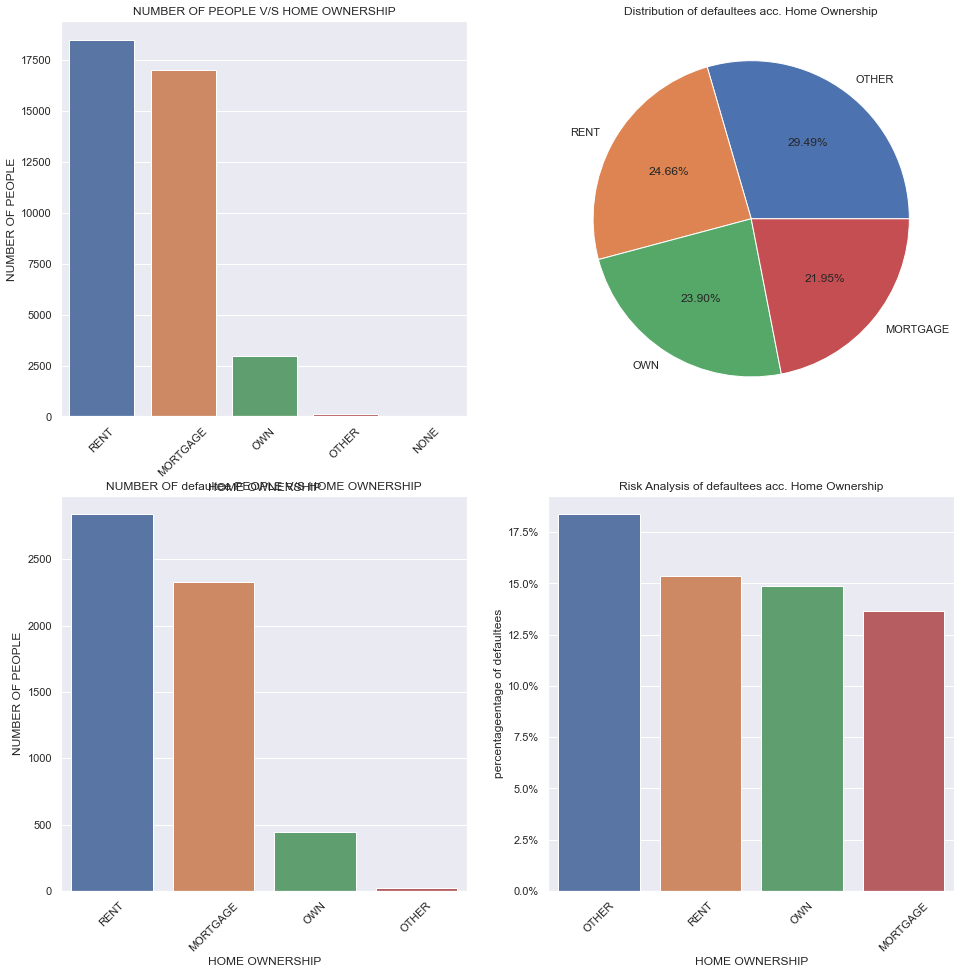

In [39]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
ax = sns.countplot(x='home_ownership',data=lending_df,order=lending_df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=45)
#plt.yscale('log')

plt.subplot(2,2,2)
plt.pie(home_df['defaultee_percentage'], labels = home_df.index,autopct='%.2f%%')
plt.title("Distribution of defaultees acc. Home Ownership")
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
ax = sns.countplot(x='home_ownership',data=defaultees_df,order=defaultees_df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF defaultee PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
ax=sns.barplot(x=home_df.index,y='defaultee_percentage',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='percentageentage of defaultees',title='Risk Analysis of defaultees acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)

plt.show()

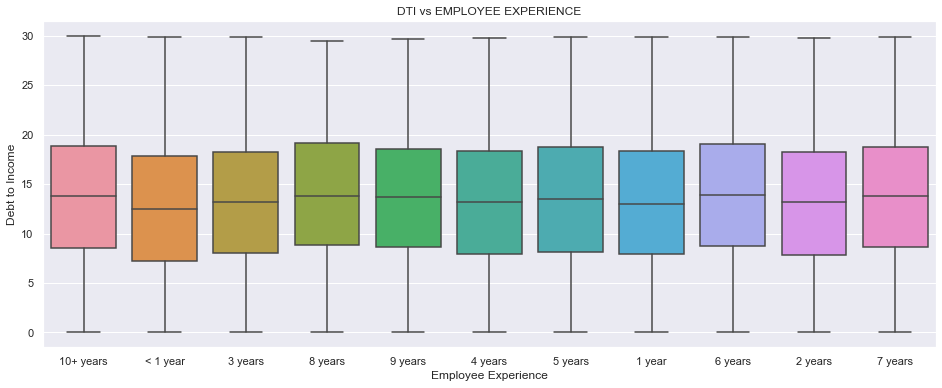

In [40]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='emp_length',y='dti',data=lending_df)
ax.set(xlabel='Employee Experience', ylabel='Debt to Income',title='DTI vs EMPLOYEE EXPERIENCE')

plt.show()


#### By doing bivariate analysis it has been observed that 10+ years of employee exp. is having debt to income in maximum range apart from that rest of employee exp.

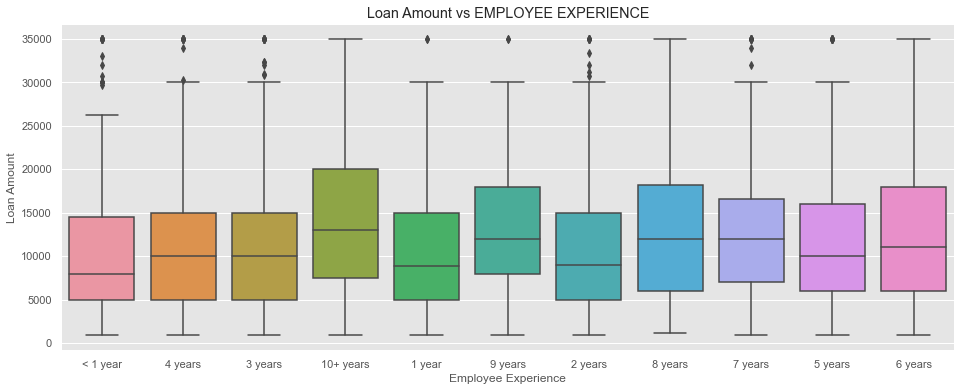

In [85]:
# Performing box plot
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='emp_length',y='loan_amnt',data=defaultees_df)
ax.set(xlabel='Employee Experience', ylabel='Loan Amount',title='Loan Amount vs EMPLOYEE EXPERIENCE')
plt.show()


####  Employees having  experience of  10+ years are taking more amount of loan and those who are less than 1 year are taking less amount of loan. The following conclusion is reached by doing bivariate analysis.

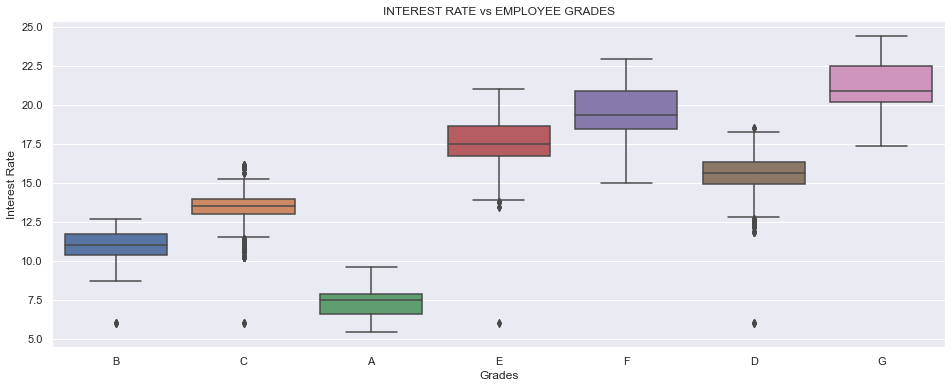

In [42]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='grade',y='int_rate',data=lending_df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

### We can conclude from the above plot  that based on grade the interest rate is going higher i.e. “A” is having minimum interest rate, whereas “G” is having maximum interest rate.

In [43]:
# calculate the median of the grade
grade_group = lending_df.groupby('grade')
grade_group['int_rate'].median()


grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [44]:
# calculate the median of the employee length
emp_group = lending_df.groupby('emp_length')
emp_group['loan_amnt'].median()


emp_length
1 year        8000
10+ years    11000
2 years       8400
3 years       9225
4 years       9600
5 years      10000
6 years      10000
7 years      10000
8 years      10000
9 years      10000
< 1 year      8000
Name: loan_amnt, dtype: int64

In [45]:
#calculate the count of loan defaultees according to address of a state
state_df=pd.DataFrame(data=defaultees_df['addr_state'].value_counts())
state_df.head()

,addr_state
CA,1125
FL,504
NY,495
TX,316
NJ,278


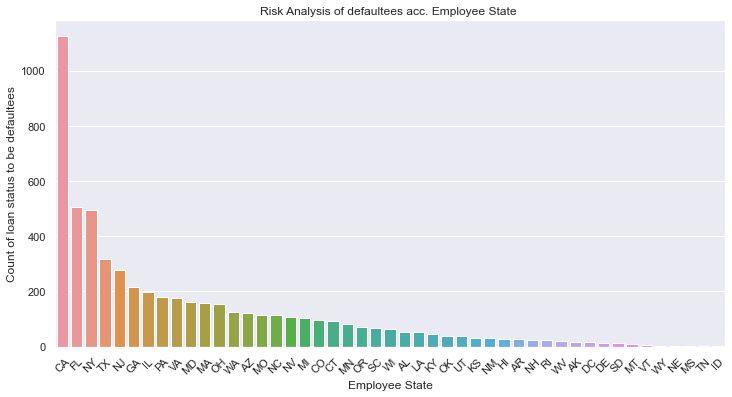

In [46]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='addr_state',data=defaultees_df,order=defaultees_df.addr_state.value_counts().index)
ax.set(xlabel='Employee State', ylabel='Count of loan status to be defaultees',title='Risk Analysis of defaultees acc. Employee State ')
plt.xticks(rotation=45)
plt.show()

### Inference: Applicants from the state CA are having high probability to be default

In [47]:
#calculate the percentage of loan defaultees according to term
term_df=pd.DataFrame(data=round((100*defaultees_df['term'].value_counts())/lending_df['term'].value_counts(),2))
term_df.rename(columns={'term':'defaultee_percentage'},inplace=True)
term_df.sort_values(by='defaultee_percentage',ascending=False,inplace=True)
term_df

,defaultee_percentage
60 months,25.31
36 months,11.09


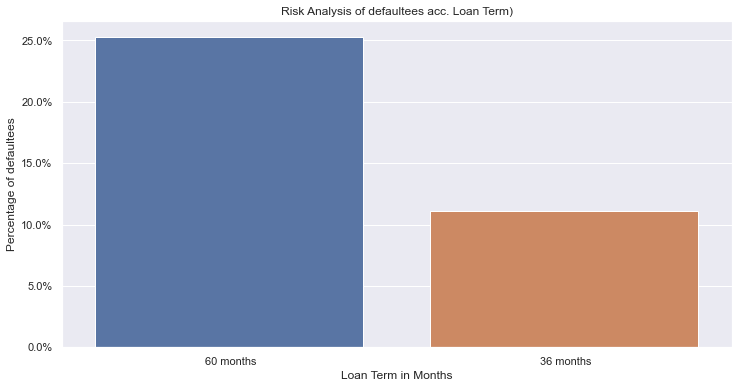

In [48]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=term_df.index,y='defaultee_percentage',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of defaultees',title='Risk Analysis of defaultees acc. Loan Term)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

### Inference-The percentage of defaultees is found to be more in 60 months as compared to 36 months – Loan Term

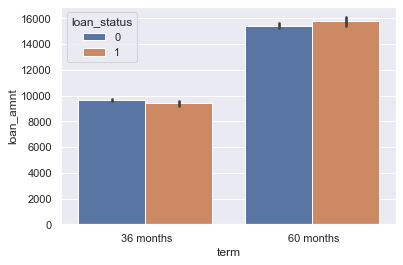

In [49]:
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=lending_df, estimator=np.mean)
plt.show()


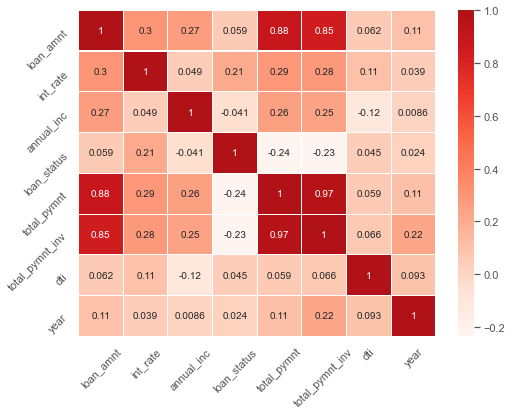

In [50]:
# Heatmap showing corelation between different variables
plt.style.use('ggplot')
corr=lending_df.corr()
fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(corr, cmap="Reds",xticklabels=corr.columns,yticklabels=corr.columns,annot=True,linewidths=.1,center=0.5)
plt.yticks(rotation=45)
plt.xticks(rotation=45)
plt.show()


## Inference
1-**Annual_income is weakly related to loan_status**

2-**dti and year is strongly related**